<a href="https://colab.research.google.com/github/Houndjoisaacetonam/Openclassroomprojet/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
df = pd.read_csv('train.csv')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
def manque(df):
 total = 100 * df.isnull().sum()/len(df)
 total = total[total>0].sort_values()
 return total

In [49]:
voir = manque(df)

In [50]:
voir

,0
Embarked,0.224467
Age,19.865320
Cabin,77.104377


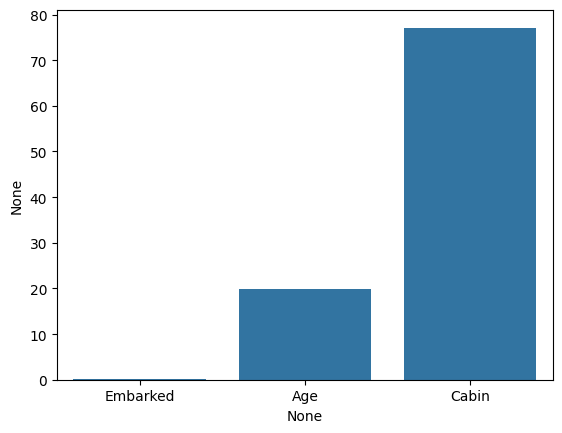

In [52]:
sns.barplot(x=voir.index,y=voir);

In [53]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [54]:
df['Embarked'].fillna('S', inplace=True)

<ipython-input-54-6ad30875ebf2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [55]:
voir = manque(df)

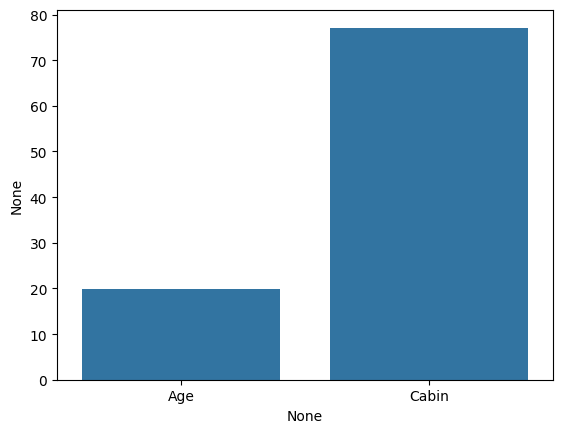

In [56]:
sns.barplot(x=voir.index,y=voir);

In [57]:
sup = ['Cabin','Name','Ticket', 'PassengerId']

In [58]:
df.drop(sup, axis=1, inplace=True)

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [88]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-88-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [89]:
numeric = df.select_dtypes(include='number')

In [90]:
non_numeric = df.select_dtypes(exclude='number')

In [91]:
df_non_num = pd.get_dummies(non_numeric, drop_first=True)

In [92]:
df = pd.concat([numeric, df_non_num], axis=1)

In [93]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [217]:
df.drop('Embarked_Q', axis=1, inplace=True)

In [218]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

StandardScaler

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
scale = StandardScaler()

In [223]:
scale_X_train = scale.fit_transform(X_train)
scale_X_test = scale.transform(X_test)

Regression Logistique avec GridSearchCV

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [233]:
model = LogisticRegression()

In [234]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 20)
}

In [235]:
grid_log = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [236]:
grid_log.fit(scale_X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used whe

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [237]:
grid_log.best_params_

{'C': 0.01, 'l1_ratio': 0.0, 'multi_class': 'ovr', 'solver': 'saga'}

In [238]:
grid_log_pred = grid_log.predict(scale_X_test)

In [239]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [240]:
confusion_matrix(y_test, grid_log_pred)

array([[144,  10],
       [ 46,  68]])

In [241]:
print(classification_report(y_test, grid_log_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       154
           1       0.87      0.60      0.71       114

    accuracy                           0.79       268
   macro avg       0.81      0.77      0.77       268
weighted avg       0.81      0.79      0.78       268



SVM

In [242]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [243]:
svm = SVC()

In [244]:
param_grid = {'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

In [245]:
grid_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

In [246]:
grid_svm.fit(scale_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [247]:
grid_svm.best_params_

{'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [248]:
grid_svm_pred = grid_svm.predict(scale_X_test)

In [249]:
confusion_matrix(y_test, grid_svm_pred)

array([[145,   9],
       [ 40,  74]])

In [250]:
print(classification_report(y_test, grid_svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.86       154
           1       0.89      0.65      0.75       114

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.80       268
weighted avg       0.83      0.82      0.81       268



SVR

In [251]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [252]:
svr = SVR()

In [253]:
param_grid = {'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'degree': [2, 3, 4]
}

In [254]:
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='accuracy')

In [255]:
grid_svr.fit(scale_X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py", line 227, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py", line 107, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of binary and continuous targets

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.2, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [256]:
grid_svr.best_params_

{'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [257]:
grid_svr_pred = grid_svr.predict(scale_X_test)

In [258]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [259]:
score = r2_score(y_test, grid_svr_pred)
score

0.1905491757668618

KNN

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [261]:
knn = KNeighborsClassifier()

In [262]:
param_grid = {'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
              }

In [263]:
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

In [264]:
grid_knn.fit(scale_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [265]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'uniform'}

In [266]:
grid_knn_pred = grid_knn.predict(scale_X_test)

In [267]:
confusion_matrix(y_test, grid_knn_pred)

array([[138,  16],
       [ 42,  72]])

In [268]:
print(classification_report(y_test, grid_knn_pred))


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       154
           1       0.82      0.63      0.71       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268



DecisionTree

In [269]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [270]:
tree = DecisionTreeClassifier()

In [271]:
param_grid = {'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 4, 5]
}

In [272]:
grid_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='accuracy')

In [273]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [274]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [275]:
grid_tree_pred = grid_tree.predict(X_test)

In [276]:
confusion_matrix(y_test, grid_tree_pred)

array([[137,  17],
       [ 40,  74]])

In [277]:
print(classification_report(y_test, grid_tree_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       154
           1       0.81      0.65      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



RandomForest

In [278]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [279]:
random = RandomForestClassifier()

In [280]:
param_grid = {'n_estimators': [100, 200, 300, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5]
}

In [281]:
grid_random = GridSearchCV(estimator=random, param_grid=param_grid, cv=5, scoring='accuracy')

In [282]:
grid_random.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             scoring='accuracy')

In [283]:
grid_random.best_params_

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 200}

In [284]:
grid_random_pred = grid_random.predict(X_test)

In [285]:
confusion_matrix(y_test, grid_random_pred)

array([[147,   7],
       [ 45,  69]])

In [286]:
print(classification_report(y_test, grid_random_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       154
           1       0.91      0.61      0.73       114

    accuracy                           0.81       268
   macro avg       0.84      0.78      0.79       268
weighted avg       0.83      0.81      0.80       268



AdaBoost

In [287]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [288]:
boost = AdaBoostClassifier()

In [289]:
param_grid = {'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.001, 0.02, 0.05, 1]
              }

In [290]:
boost_grid = GridSearchCV(estimator=boost, param_grid=param_grid, cv=5, scoring='accuracy')

In [291]:
boost_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.02, 0.05, 1],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             scoring='accuracy')

In [292]:
boost_grid.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [293]:
boost_grid_pred = boost_grid.predict(X_test)

In [294]:
confusion_matrix(y_test, boost_grid_pred)

array([[132,  22],
       [ 40,  74]])

In [295]:
print(classification_report(y_test, boost_grid_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.65      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



GradBoost

In [296]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [297]:
grad = GradientBoostingClassifier()

In [321]:
param_grid = {'n_estimators': [1000, 2000, 5000],
    'learning_rate': [0.001]
}

In [322]:
grad_grid = GridSearchCV(estimator=grad, param_grid=param_grid, cv=5, scoring='accuracy')

In [323]:
grad_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001],
                         'n_estimators': [1000, 2000, 5000]},
             scoring='accuracy')

In [324]:
grad_grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [325]:
grad_grid_pred = grad_grid.predict(X_test)

In [326]:
confusion_matrix(y_test, grad_grid_pred)

array([[149,   5],
       [ 49,  65]])

In [327]:
print(classification_report(y_test, grad_grid_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       154
           1       0.93      0.57      0.71       114

    accuracy                           0.80       268
   macro avg       0.84      0.77      0.78       268
weighted avg       0.83      0.80      0.79       268



In [328]:
feature_importance = grid_random.best_estimator_.feature_importances_

In [329]:
features = X_train.columns

In [330]:
feature_importance_df = pd.DataFrame({'Features': features, 'Importance': feature_importance})

In [331]:
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

In [332]:
feature_importance_df

,Features,Importance
5,Sex_male,0.456635
4,Fare,0.192808
0,Pclass,0.140349
1,Age,0.092750
2,SibSp,0.048627
6,Embarked_S,0.039052
3,Parch,0.029779


Light

In [311]:
from lightgbm import LGBMClassifier

In [312]:
lgt = LGBMClassifier(n_estimators=1000, objective='binary', random_state=101, boosting_type='gbdt')

In [313]:
lgt.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 228, number of negative: 395
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.365971 -> initscore=-0.549540
[LightGBM] [Info] Start training from score -0.549540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(n_estimators=1000, objective='binary', random_state=101)

In [314]:
lgt_pred = lgt.predict(X_test)

In [315]:
confusion_matrix(y_test, lgt_pred)

array([[132,  22],
       [ 35,  79]])

In [320]:
print(classification_report(y_test, lgt_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       154
           1       0.78      0.69      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

